<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0320_HY_combined_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0320_HY_combined_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

^C


In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas.plotting import register_matplotlib_converters


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 맑은 고딕 적용
matplotlib.rc('font', family = 'NanumGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus = False)

In [ ]:
df = pd.read_csv("kurly.csv")
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [ ]:
df.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName',
       'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'CleanedItemName', 'TimeBetweenOrders',
       'Combined', 'Weekday', 'WeekdayName'],
      dtype='object')

In [ ]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,YearMonthStr
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12


In [ ]:
# 신선식품, 가공식품 데이터프레임 생성
df_2030f = df[df["Combined"] == "2030s, 여성"]
df_2030m = df[df["Combined"] == "2030s, 남성"]

# 월별 매출액 시계열 자료로 변환
df_2030f_time = df_2030f.groupby('YearMonthStr')['Price'].sum().reset_index()
df_2030m_time = df_2030m.groupby('YearMonthStr')['Price'].sum().reset_index()

# 날짜를 인덱스로
df_2030f_timeseries = df_2030f_time.set_index(keys='YearMonthStr')
df_2030m_timeseries = df_2030m_time.set_index(keys='YearMonthStr')

- 데이터에 1년 단위로 계절성이 있으므로 SARIMA 모델을 진행.

## 2030s 여성

In [ ]:
# 2030s 여성 auto_arima
ts_model = auto_arima(df_2030f_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1271.658, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1250.888, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1247.765, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1249.340, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1248.448, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1250.476, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1248.797, Time=0.02 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.324 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_2030f = ARIMA(df_2030f_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_2030f = ts_model_2030f.fit()
print(ts_result_2030f.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -384.245
Date:                          Thu, 21 Mar 2024   AIC                            776.490
Time:                                  00:37:09   BIC                            780.854
Sample:                              01-01-2021   HQIC                           777.518
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9421      0.100     -9.436      0.000      -1.138      -0.746
ar.S.L12      -0.8193      3.727     -0.220      0.

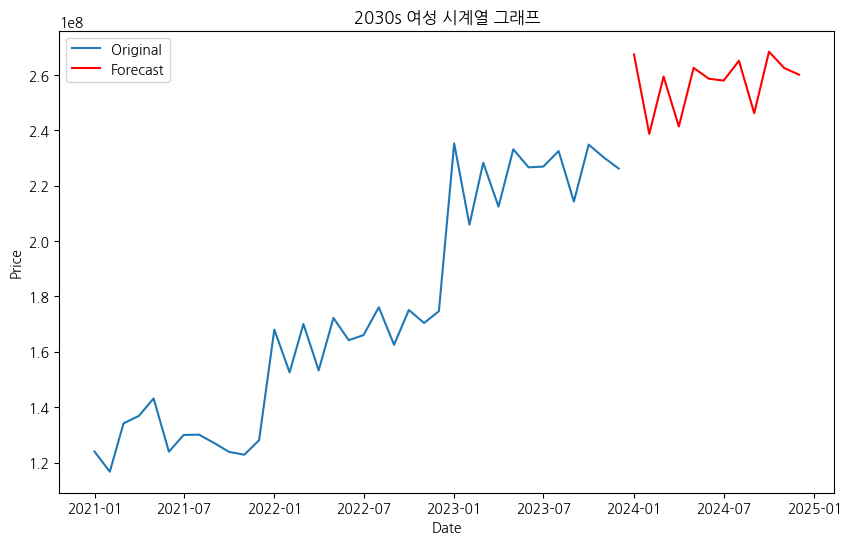

In [ ]:
data = df_2030f_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data['YearMonthStr'] = pd.to_datetime(data['YearMonthStr'])
data.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('2030s 여성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 2030s 남자

In [ ]:
# 2030s 남자 auto_arima
ts_model = auto_arima(df_2030m_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1238.405, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1260.826, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1238.109, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1235.596, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1234.680, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1236.854, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1235.538, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1234.138, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1234.314, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1236.694, Time=0.04 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.381 seconds


In [ ]:
# Train 데이터 이용, AR(1), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_2030m = ARIMA(df_2030m_timeseries, order = (1, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_2030m = ts_model_2030m.fit()
print(ts_result_2030m.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -379.465
Date:                          Thu, 21 Mar 2024   AIC                            768.930
Time:                                  00:37:10   BIC                            774.385
Sample:                              01-01-2021   HQIC                           770.215
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5558      0.328     -1.692      0.091      -1.200       0.088
ma.L1         -0.9435      0.085    -11.058      0.

In [ ]:
data2 = df_2030m_time.copy()

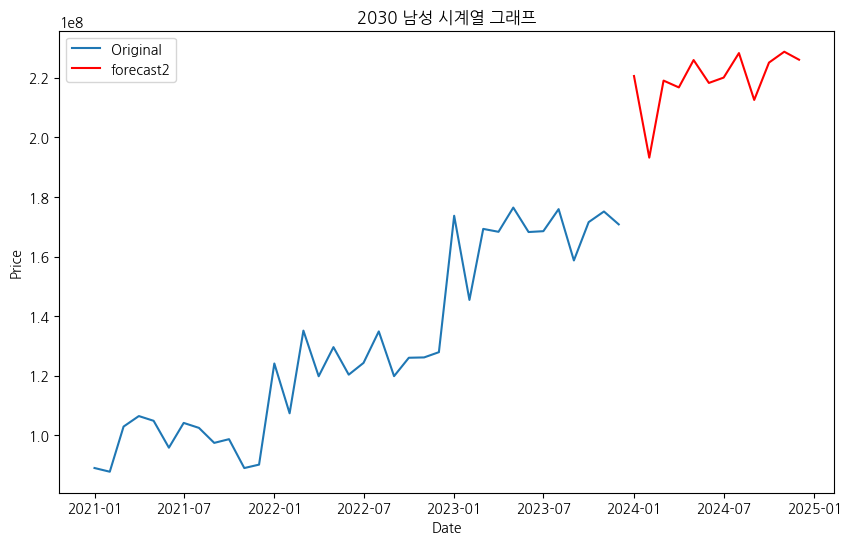

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data2['YearMonthStr'] = pd.to_datetime(data2['YearMonthStr'])
data2.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.

# 모델 학습
model = SARIMAX(data2['Price'], order=(1, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast2 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Price'], label='Original')
plt.plot(forecast2.index, forecast2, label='forecast2', color='red')
plt.title('2030 남성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 4060s 여성

In [ ]:
# 신선식품, 가공식품 데이터프레임 생성
df_4060f = df[df["Combined"] == "4060s, 여성"]
df_4060m = df[df["Combined"] == "4060s, 남성"]

# 월별 매출액 시계열 자료로 변환
df_4060f_time = df_4060f.groupby('YearMonthStr')['Price'].sum().reset_index()
df_4060m_time = df_4060m.groupby('YearMonthStr')['Price'].sum().reset_index()

# 날짜를 인덱스로
df_4060f_timeseries = df_4060f_time.set_index(keys='YearMonthStr')
df_4060m_timeseries = df_4060m_time.set_index(keys='YearMonthStr')

In [ ]:
# 4060s 여자 auto_arima
ts_model = auto_arima(df_4060f_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1216.626, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1241.957, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1215.301, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1217.516, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1213.806, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1215.303, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1215.003, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1212.497, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1213.996, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1216.862, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1213.470, Time=0.02 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.268 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_4060f = ARIMA(df_4060f_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_4060f = ts_model_4060f.fit()
print(ts_result_4060f.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -384.516
Date:                          Thu, 21 Mar 2024   AIC                            777.033
Time:                                  00:37:11   BIC                            781.397
Sample:                              01-01-2021   HQIC                           778.061
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9031      0.462     -1.956      0.051      -1.808       0.002
ar.S.L12      -0.6191      1.414     -0.438      0.

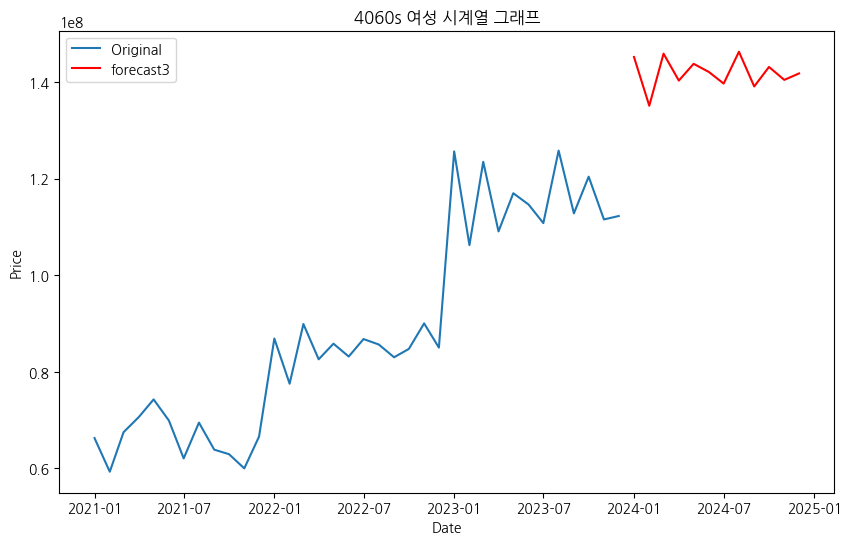

In [ ]:
data3 = df_4060f_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data3['YearMonthStr'] = pd.to_datetime(data3['YearMonthStr'])
data3.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data3['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast3 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data3.index, data3['Price'], label='Original')
plt.plot(forecast3.index, forecast3, label='forecast3', color='red')
plt.title('4060s 여성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 4060s 남성

In [ ]:
# 4060s 남자 auto_arima
ts_model = auto_arima(df_4060m_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1188.534, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1164.267, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1162.960, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1160.751, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1163.620, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1163.613, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.410 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_4060m = ARIMA(df_2030m_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_4060m = ts_model_4060m.fit()
print(ts_result_4060m.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -382.767
Date:                          Thu, 21 Mar 2024   AIC                            773.534
Time:                                  00:37:12   BIC                            777.898
Sample:                              01-01-2021   HQIC                           774.562
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9738      0.159     -6.143      0.000      -1.284      -0.663
ar.S.L12      -0.7500      6.568     -0.114      0.

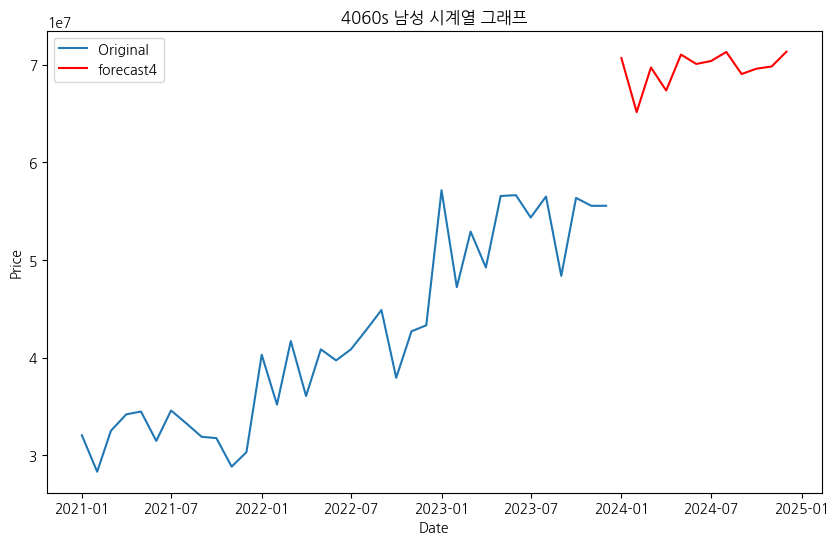

In [ ]:
data4 = df_4060m_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data4['YearMonthStr'] = pd.to_datetime(data4['YearMonthStr'])
data4.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data4['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast4 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data4.index, data4['Price'], label='Original')
plt.plot(forecast4.index, forecast4, label='forecast4', color='red')
plt.title('4060s 남성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

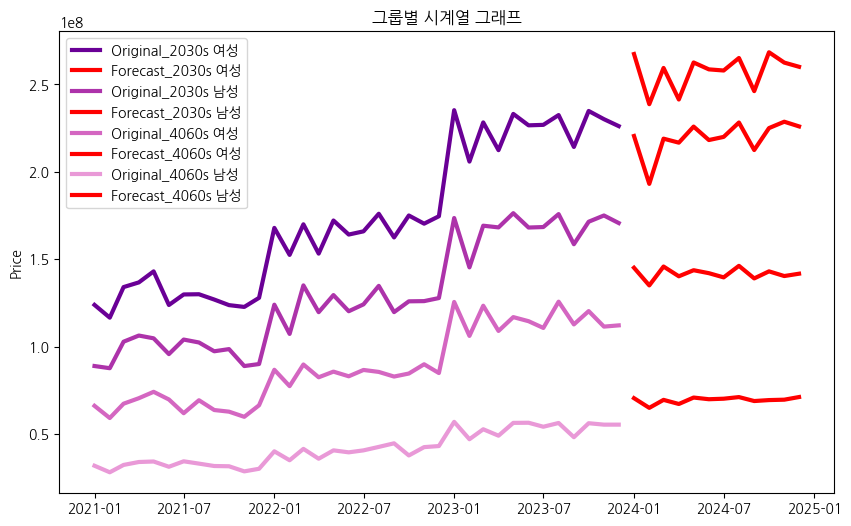

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data.index, data['Price'], label='Original_2030s 여성', color = '#6A0096', linewidth = '3')
plt.plot(forecast.index, forecast, label='Forecast_2030s 여성', color='red',linewidth = '3')

plt.plot(data2.index, data2['Price'], label='Original_2030s 남성', color ='#AD33AA',linewidth = '3')
plt.plot(forecast2.index, forecast2, label='Forecast_2030s 남성', color='red',linewidth = '3')

plt.plot(data3.index, data3['Price'], label='Original_4060s 여성', color = '#D466C1',linewidth = '3')
plt.plot(forecast3.index, forecast3, label='Forecast_4060s 여성', color='red',linewidth = '3')

plt.plot(data4.index, data4['Price'], label='Original_4060s 남성', color ='#E999D7',linewidth = '3' )
plt.plot(forecast4.index, forecast4, label='Forecast_4060s 남성', color='red',linewidth = '3')

plt.title('그룹별 시계열 그래프')
plt.ylabel('Price')
plt.legend()
plt.show()

- 2030에 비해 4060의 예상매출 증가폭이 적음.
- 2030과 4060의 매출액의 폭이 점점 벌어짐.
- 4060의 매출 증가를 위해 마케팅필요

# 2030

In [ ]:
# 신선식품, 가공식품 데이터프레임 생성
df_2030 = df[df['AgeGroup'] == "2030s"]
df_4060 = df[df['AgeGroup'] == "4060s"]

In [ ]:
# 월별 매출액 시계열 자료로 변환
df_2030_time = df_2030.groupby('YearMonthStr')['Price'].sum().reset_index()
df_4060_time = df_4060.groupby('YearMonthStr')['Price'].sum().reset_index()

# 날짜를 인덱스로
df_2030_timeseries = df_2030_time.set_index(keys='YearMonthStr')
df_4060_timeseries = df_4060_time.set_index(keys='YearMonthStr')

In [ ]:
# 2030 auto_arima
ts_model = auto_arima(df_2030_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1293.033, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1312.800, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1290.710, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1288.458, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1288.729, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1287.759, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1289.666, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1288.301, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1290.289, Time=0.18 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 1.580 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_2030 = ARIMA(df_2030_timeseries, order = (0, 2, 2), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_2030 = ts_model_2030.fit()
print(ts_result_2030.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   36
Model:             ARIMA(0, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -394.744
Date:                            Thu, 21 Mar 2024   AIC                            799.488
Time:                                    22:51:24   BIC                            804.943
Sample:                                01-01-2021   HQIC                           800.773
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2283      0.324     -3.791      0.000      -1.863      -0.593
ma.L2          0.2766      0.338   

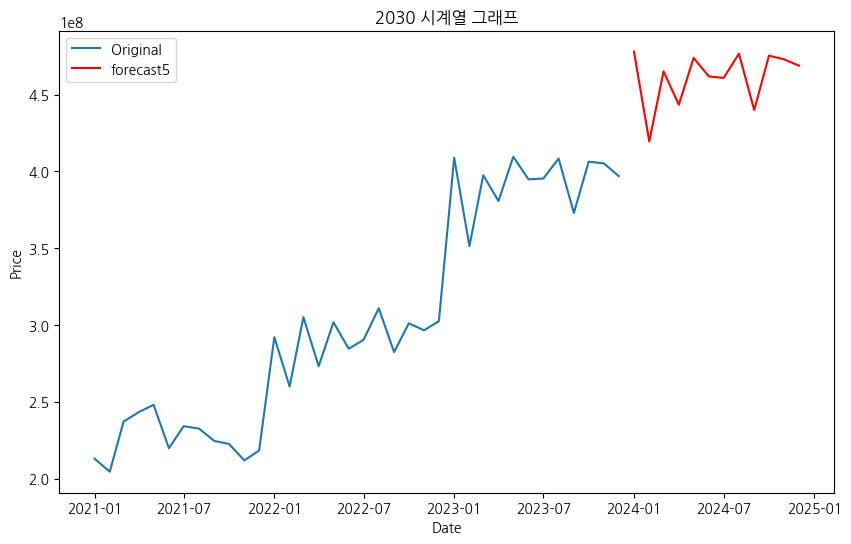

In [ ]:
data5 = df_2030_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data5['YearMonthStr'] = pd.to_datetime(data5['YearMonthStr'])
data5.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data5['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast5 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data5.index, data5['Price'], label='Original')
plt.plot(forecast5.index, forecast5, label='forecast5', color='red')
plt.title('2030 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# 4060

In [ ]:
# 4060 auto_arima
ts_model = auto_arima(df_4060_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1240.306, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1265.602, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1238.615, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1241.240, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1237.954, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1239.340, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1238.279, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1236.522, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1237.713, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1240.690, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1237.607, Time=0.10 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.140 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_4060 = ARIMA(df_4060_timeseries, order = (1,2,1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_4060 = ts_model_4060.fit()
print(ts_result_4060.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -378.748
Date:                          Thu, 21 Mar 2024   AIC                            767.497
Time:                                  22:51:27   BIC                            772.952
Sample:                              01-01-2021   HQIC                           768.782
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8102      0.216     -3.758      0.000      -1.233      -0.388
ma.L1         -0.9052      0.095     -9.531      0.

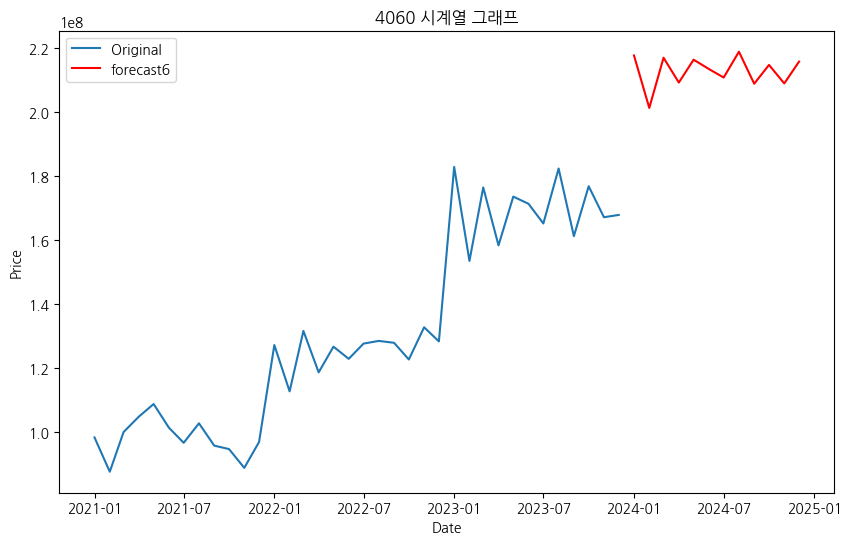

In [ ]:
data6 = df_4060_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data6['YearMonthStr'] = pd.to_datetime(data6['YearMonthStr'])
data6.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data6['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast6 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data6.index, data6['Price'], label='Original')
plt.plot(forecast6.index, forecast6, label='forecast6', color='red')
plt.title('4060 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


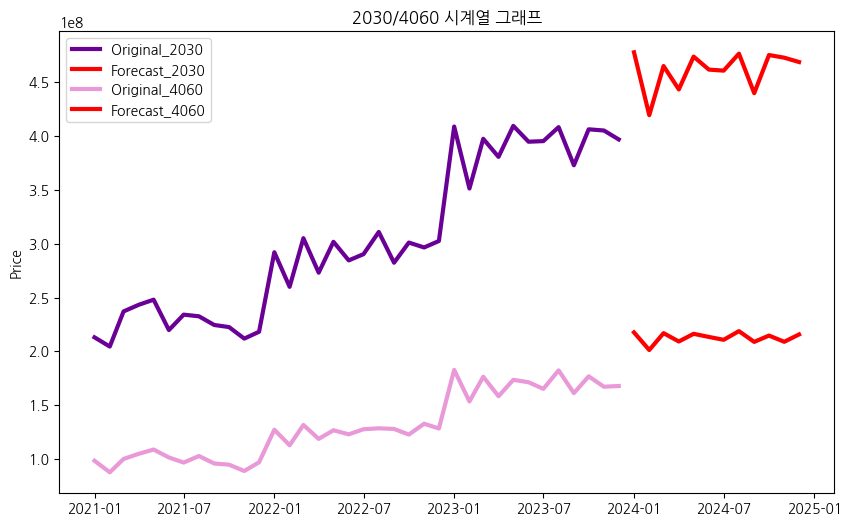

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data5.index, data5['Price'], label='Original_2030', color = '#6A0096', linewidth = '3')
plt.plot(forecast5.index, forecast5, label='Forecast_2030', color='red',linewidth = '3')


plt.plot(data6.index, data6['Price'], label='Original_4060', color ='#E999D7',linewidth = '3' )
plt.plot(forecast6.index, forecast6, label='Forecast_4060', color='red',linewidth = '3')

plt.title('2030/4060 시계열 그래프')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data5

,Price
YearMonthStr,
2021-01-01,213044580
2021-02-01,204496320
2021-03-01,237127240
2021-04-01,243332100
2021-05-01,248044540
2021-06-01,219801380
2021-07-01,234142890
2021-08-01,232594520
2021-09-01,224530240


In [ ]:
pd.options.display.float_format = '{:5f}'.format

In [ ]:
pd.DataFrame(forecast5)

,predicted_mean
2024-01-01,477978179.137293
2024-02-01,419520240.327041
2024-03-01,465186871.298399
2024-04-01,443461025.656802
2024-05-01,473958738.394334
2024-06-01,461866137.222379
2024-07-01,460930825.219707
2024-08-01,476695465.175204
2024-09-01,439977246.670652
2024-10-01,475416954.066966


In [ ]:
data6

,Price
YearMonthStr,
2021-01-01,98337980
2021-02-01,87636130
2021-03-01,100023890
2021-04-01,104841220
2021-05-01,108774970
2021-06-01,101392740
2021-07-01,96666710
2021-08-01,102757730
2021-09-01,95784790


In [ ]:
pd.DataFrame(forecast6)

,predicted_mean
2024-01-01,217635969.905289
2024-02-01,201261651.934747
2024-03-01,216935643.156862
2024-04-01,209182507.098361
2024-05-01,216317510.110376
2024-06-01,213415290.530027
2024-07-01,210751097.200534
2024-08-01,218809601.877228
2024-09-01,208810356.577166
2024-10-01,214690817.718293
